In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing insurance file from https://www.kaggle.com/mirichoi0218/insurance
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


This insurance file is a record of how much beneficiaries are being charged for medical insurance in the US, along with data about the beneficiary that might have an impact on these charges.  Let's see what values most affect someone's insurance price.  To kick things off, I'll start with a correlation heatmap between the numeric variables.

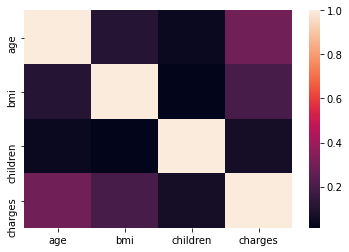

In [52]:
sns.heatmap(df.corr())
plt.show()

There seems to be some correlation between the charges and peoples' age.  Let's use a scatter plot to look at this in closer detail.

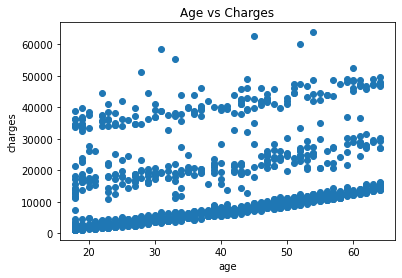

In [69]:
plt.figure(figsize=(12.5,7.5))
plt.scatter('age', 'charges', data=df)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges')
plt.show()

There is definitely some correlation between the two, but what's odd is the pattern of parallel lines within this graph.  This implies that there is some other major factor playing into the charges, so let's take a look at the column that had the second-highest correlation with charges, BMI.

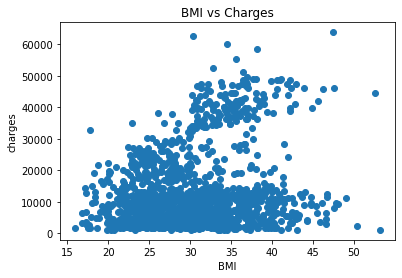

In [70]:
plt.figure(figsize=(12.5,7.5))
plt.scatter('bmi', 'charges', data=df)
plt.xlabel('BMI')
plt.ylabel('charges')
plt.title('BMI vs Charges')
plt.show()

Unlike age, there is no clear pattern here.  While there is some correlation between BMI and charges, it seems like the data follows two paths: one where charges increase as BMI increases, and one where charges stay relatively low regardless of BMI.  The last numeric column to check is the number of children belonging to the beneficiary.

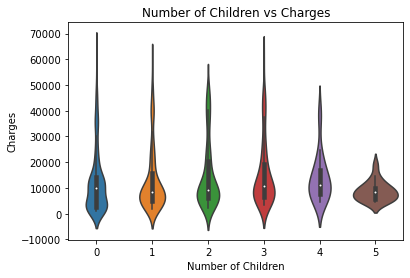

In [93]:
sns.violinplot('children', 'charges', data=df)
plt.xlabel('number of children')
plt.ylabel('charges')
plt.title('Charges by Number of Children')
plt.show()

There's not a lot of distinction between the charges compared to the number of children, other than that having 4-5 children seems to have less extreme examples.  This is possibly due to insurance being bundled differently for that number of dependants, or perhaps due to 3rd party variables not shown here.  In any case, the categorical variables should be compared as well.

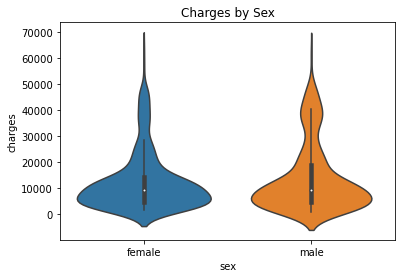

In [101]:
sns.violinplot('sex', 'charges', data=df)
plt.title('Charges by Sex')
plt.show()

The two sexes seem to have very similar plots, with males having slightly more charges in the 40k-50k range.  Next is the region of the US that the beneficiary lives in.

[]

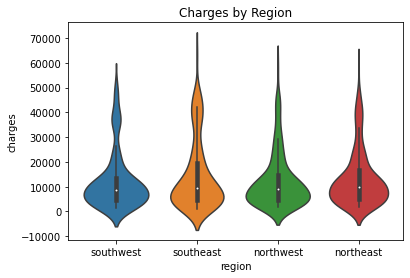

In [102]:
sns.violinplot('region', 'charges', data=df)
plt.title('Charges by Region')
plt.plot()

The southeast region has the most of the higher charges, but other than that the distributions are fairly similar.  Lastly, let's look into the smoking habits of the beneficiary.

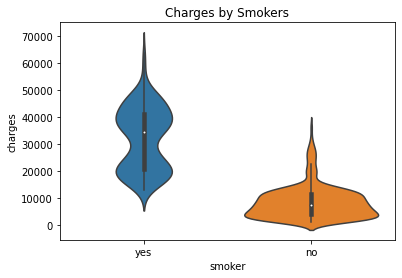

In [152]:
sns.violinplot('smoker', 'charges', data=df)
plt.title('Charges by Smokers')
plt.show()

Unlike some of the other columns, there is a very clear difference here in the charges between smokers and nonsmokers, with smokers being charged much more on average.  Let's add this to the age scatter plot to see if it helps account for the striping pattern.

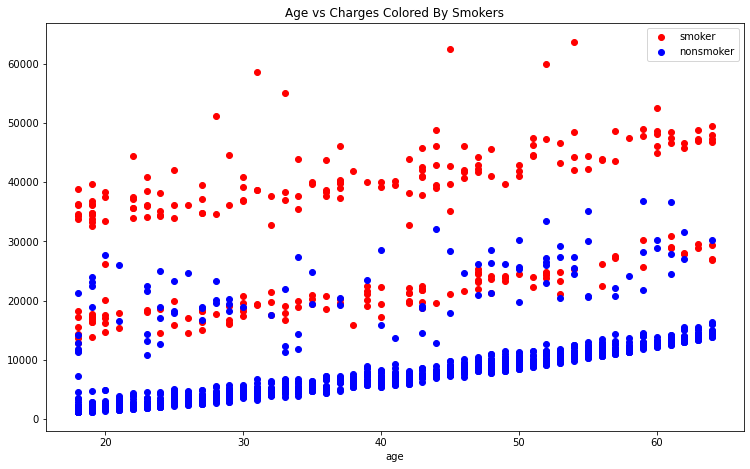

In [79]:
plt.figure(figsize=(12.5,7.5))
plt.scatter('age', 'charges', data=df[df['smoker']=='yes'], c='red', label='smoker')
plt.scatter('age', 'charges', data=df[df['smoker']=='no'], c='blue', label='nonsmoker')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.title('Age vs Charges Colored By Smokers')
plt.show()

The introduction of the smoking column helps paint a much clearer picture of this data.  Nonsmokers tend to have much lower charges than their smoking counterparts, to the point where the lowest stripe is completely made of nonsmokers, and the highest stripe is completely made of smokers.  I bet that the presence of smoking might also be an indicator in the split that the BMI vs Charges graph had.  Let's find out.

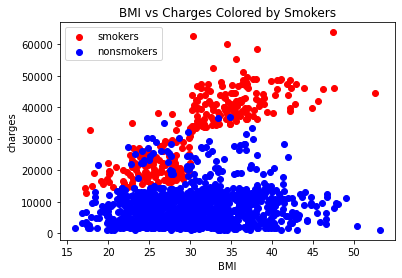

In [154]:
plt.figure(figsize=(12.5,7.5))
plt.scatter('bmi', 'charges', data=df[df['smoker']=='yes'], c='red', label='smokers')
plt.scatter('bmi', 'charges', data=df[df['smoker']=='no'], c='blue', label='nonsmokers')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.title('BMI vs Charges Colored by Smokers')
plt.legend()
plt.show()

Looks like there is a distinction based off of whether or not someone smokes.  The last mystery I want to solve is where the mid le stripe in the ages graph comes from.  Perhaps the region has something to do with it?

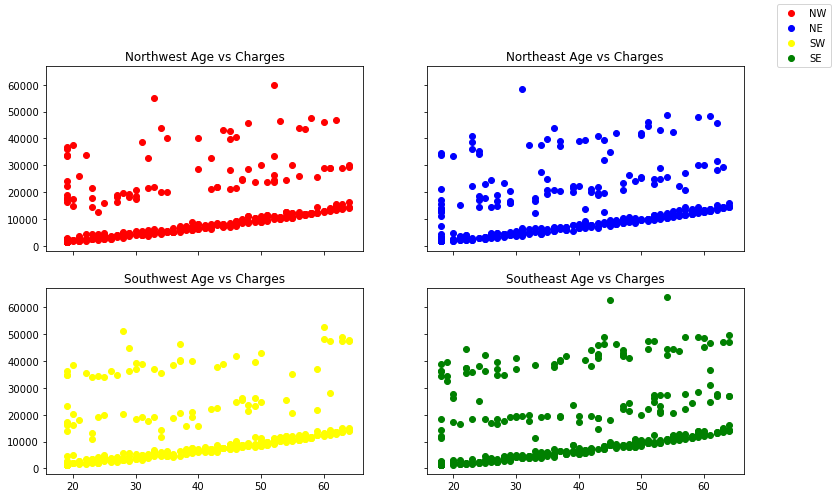

In [155]:
figs, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12.5, 7.5))
axs[0, 0].scatter('age', 'charges', data=df[df['region']=='northwest'], c='red', label='NW')
axs[0, 1].scatter('age', 'charges', data=df[df['region']=='northeast'], c='blue', label='NE')
axs[1, 0].scatter('age', 'charges', data=df[df['region']=='southwest'], c='yellow', label='SW')
axs[1, 1].scatter('age', 'charges', data=df[df['region']=='southeast'], c='green', label='SE')

axs[0, 0].title.set_text('Northwest Age vs Charges')
axs[0, 1].title.set_text('Northeast Age vs Charges')
axs[1, 0].title.set_text('Southwest Age vs Charges')
axs[1, 1].title.set_text('Southeast Age vs Charges')
figs.legend()
plt.show()

Having assumed the remaining difference rates were a product of prices differing by region, my hypothesis appears to be incorrect.  All four regions have the same three stripes in roughly the same configuration.  Let's also compare Age and Charges with BMI and Children to see if either of those fill in the gaps.

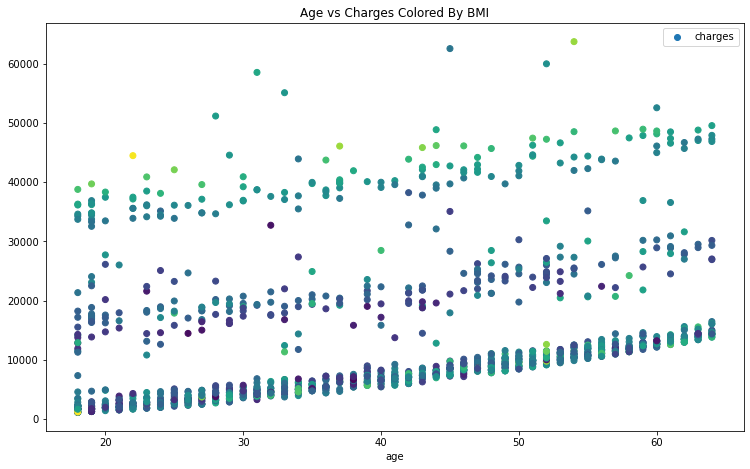

In [119]:
plt.figure(figsize=(12.5,7.5))
plt.scatter('age', 'charges', data=df, c='bmi')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges Colored By BMI')
plt.show()

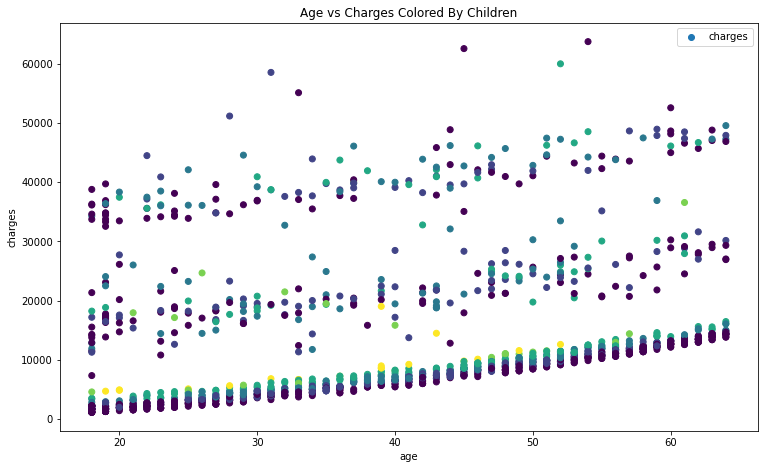

In [120]:
plt.figure(figsize=(12.5,7.5))
plt.scatter('age', 'charges', data=df, c='children')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges Colored By Children')
plt.show()

Not seeing a clear pattern with children, but BMI seems to have some correlation to the charge, even if not as strongly as smoking.  Let's take a look at the combination of age, smoker, and bmi weighed against the charges.

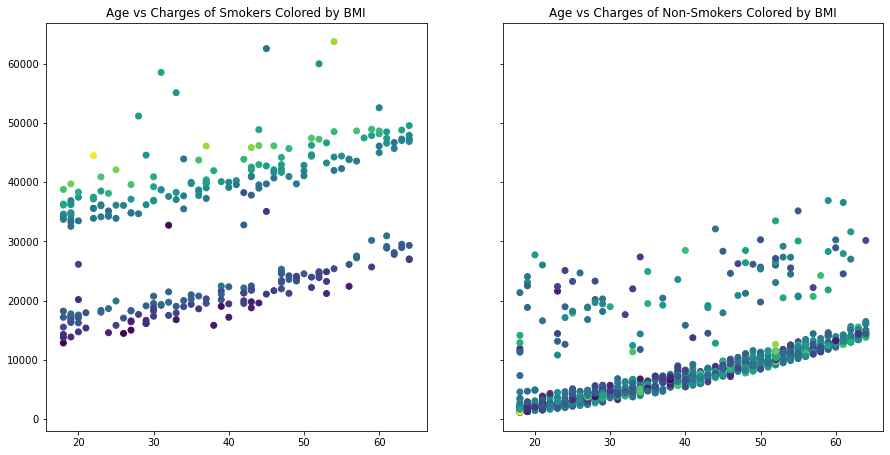

In [161]:
figs, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 7.5))
axs[0].scatter('age', 'charges', data=df[df['smoker']=='yes'], c='bmi')
axs[1].scatter('age', 'charges', data=df[df['smoker']=='no'], c='bmi')
axs[0].title.set_text('Age vs Charges of Smokers Colored by BMI')
axs[1].title.set_text('Age vs Charges of Non-Smokers Colored by BMI')
plt.show()

While it doesn't explain the break from the bottom line for non-smokers very well, it appears as though the stripe that a smoker belongs to is largely affected by their BMI; with lower BMI's being linked to the middle stripe and higher BMI's being attributed to the top stripe.